In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
import csv
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)
import numpy as np
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import CleanData, SaveState
importlib.reload(CleanData)
importlib.reload(SaveState)
from CleanData import clean_comment, get_bag_of_words

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


[nltk_data] Downloading package stopwords to /home/zchao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [4]:
# Get stopword list
stop_words = stopwords.words('english')
number_strs = ['one', 'two', 'three', 'four', 'five', 'six', 'seven',\
'eight', 'nine', 'ten']
stop_words.extend(number_strs)

In [5]:
clean_c = lambda x: clean_comment(x)
X_train_clean = list(map(clean_c, X_train))
X_test_clean = list(map(clean_c, X_test))

In [6]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(X_train_clean+X_test_clean)

In [7]:
bag_of_words.shape, len(X_train_clean), len(X_test_clean)

((18846, 156491), 11314, 7532)

In [8]:
X_train = bag_of_words[:11314,:]
X_test = bag_of_words[11314:,:]

In [9]:
X_train.shape

(11314, 156491)

In [10]:
tfidf = TfidfTransformer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.fit_transform(X_test)

In [11]:
X_train_tf.shape

(11314, 156491)

In [12]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.70      0.69      0.69       319
          1       0.66      0.67      0.66       389
          2       0.71      0.66      0.68       394
          3       0.61      0.68      0.64       392
          4       0.74      0.77      0.75       385
          5       0.78      0.69      0.73       395
          6       0.80      0.88      0.84       390
          7       0.83      0.84      0.83       396
          8       0.90      0.92      0.91       398
          9       0.88      0.89      0.88       397
         10       0.92      0.92      0.92       399
         11       0.89      0.89      0.89       396
         12       0.70      0.71      0.70       393
         13       0.82      0.79      0.80       396
         14       0.89      0.89      0.89       394
         15       0.79      0.87      0.83       398
         16       0.71      0.86      0.78       364
         17       0.94      0.77      0.85   

In [2]:
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

NameError: name 'newsgroups_train' is not defined

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

vectorizer_x = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer_x.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer_x.transform(X_test).toarray()
print("tf-idf with",str(np.array(X_train_tfidf).shape[1]),"features")

tf-idf with 10000 features


In [16]:
X_train_tfidf.shape, X_test_tfidf.shape

((11314, 10000), (7532, 10000))

In [17]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    node = 512
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(node, input_shape=(shape,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(node, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(node,input_dim=shape, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(nClasses, activation=tf.nn.softmax)
    ])

 
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    
    model.compile(loss=loss_object,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 20)
model_DNN.summary()

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1

In [5]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              epochs=10,
                              batch_size=128,
                              verbose=2)

NameError: name 'y_train' is not defined

In [21]:
predicted = model_DNN.predict_classes(X_test_tfidf)

print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.83      0.62      0.71       319
          1       0.68      0.74      0.71       389
          2       0.68      0.78      0.72       394
          3       0.72      0.71      0.72       392
          4       0.85      0.71      0.78       385
          5       0.83      0.71      0.76       395
          6       0.85      0.86      0.85       390
          7       0.86      0.87      0.86       396
          8       0.89      0.93      0.91       398
          9       0.93      0.89      0.91       397
         10       0.96      0.96      0.96       399
         11       0.94      0.90      0.92       396
         12       0.68      0.74      0.71       393
         13       0.89      0.82      0.85       396
         14       0.88      0.90      0.89       394
         15       0.74      0.94      0.83       398
         16       0.72      0.91      0.80       364
         17       0.98      0.83      0.90   

In [3]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.1.0


In [4]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

Shuffling and writing examples to /home/zchao/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM3HD99/imdb_reviews-train.tfrecord
Shuffling and writing examples to /home/zchao/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM3HD99/imdb_reviews-test.tfrecord
Shuffling and writing examples to /home/zchao/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM3HD99/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /home/zchao/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
encoder = info.features['text'].encoder
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [7]:
for ts in encoded_string:
    print ('{} ----> {}'.format(ts, encoder.decode([ts])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [12]:
for train_example, train_label in train_data.take(5):
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0
Encoded text: [  12   31   93  867    7 1256 6585 7961  421  365]
Label: 0
Encoded text: [ 636  102 4714    8    1 4333    4 4135   47 1325]
Label: 0
Encoded text: [  62    9    1  312    6   32   23    4 7809   47]
Label: 1
Encoded text: [ 249  929   31 2699  104    2   51    1  707   13]
Label: 1


In [18]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, padded_shapes=([None],[])))

test_batches = (
    test_data
    .padded_batch(32, padded_shapes=([None],[])))

In [19]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("label shape:", label_batch.shape)

Batch shape: (32, 970)
label shape: (32,)
Batch shape: (32, 1021)
label shape: (32,)


In [21]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    
    keras.layers.Dense(1)])

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.6803 - accuracy: 0.5009 - val_loss: 0.6613 - val_accuracy: 0.5052
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6170 - accuracy: 0.5583 - val_loss: 0.5918 - val_accuracy: 0.5813
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5370 - accuracy: 0.6685 - val_loss: 0.5346 - val_accuracy: 0.7823
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4703 - accuracy: 0.7543 - val_loss: 0.4802 - val_accuracy: 0.7896
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4161 - accuracy: 0.8070 - val_loss: 0.4422 - val_accuracy: 0.7833
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3777 - accuracy: 0.8362 - val_loss: 0.4149 - val_accuracy: 0.8313
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3465 - accuracy: 0.8545 - val_loss: 0.3954 - val_accuracy: 0.8448
Epoch 

In [23]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 2s 3ms/step - loss: 0.3317 - accuracy: 0.8508Loss:  0.33174984388606016
Accuracy:  0.85076


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

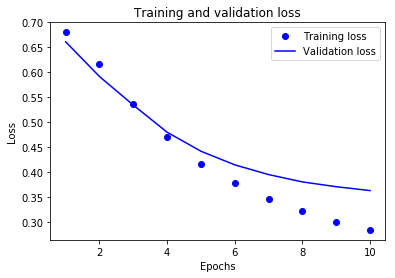

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

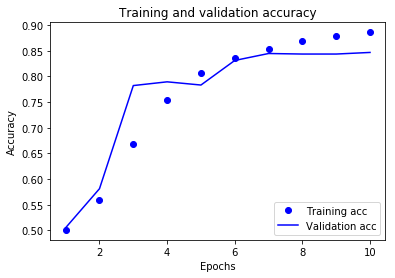

In [27]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()